In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:

import aedes
from aedes.remote_sensing_utils import get_satellite_measures_from_AOI
from aedes.remote_sensing_utils import perform_clustering, visualize_on_map

from aedes.osm_utils import initialize_OSM_network, get_OSM_network_data, reverse_geocode_points, reverse_geocode_center_of_geojson

In [5]:
# !pip3 install --upgrade pandas

In [6]:
pwd

'/Users/xavier/Desktop/aedes/pypi_package/aedes'

In [7]:
# import ee
# service_account = 'gcp-cirro-xavier-ee@gcp-cirro-xavier.iam.gserviceaccount.com'
# credentials = ee.ServiceAccountCredentials(service_account, 'gcp-cirro-xavier-2158f076a9ef.json')
# ee.Initialize(credentials)


In [4]:
aedes.remote_sensing_utils.initialize()

In [9]:
# !ls $HOME/.config/earthengine/credentials

In [10]:
# !tail $HOME/.config/earthengine/credentials

In [5]:
aoi_geojson = [[
                [120.98976275,14.58936896],
                [121.13383232,14.58936896],
                [121.13383232,14.77641364],
                [120.98976275,14.77641364],
                [120.98976275,14.58936896]
]]

laguan_aoi_geojson = [[
                [121.00197333,13.96948967],
                [121.59683223,13.96948967],
                [121.59683223,14.56562999],
                [121.00197333,14.56562999],
                [121.00197333,13.96948967]]]

cotabato_aoi_geojson = [[[124.1548627939,7.1505616554],
                         [124.3336516508,7.1505616554],
                         [124.3336516508,7.2730654185],
                         [124.1548627939,7.2730654185],
                         [124.1548627939,7.1505616554]]]



In [40]:
from shapely.geometry import box

bounds = cotabato_aoi_geojson[0][0][1], cotabato_aoi_geojson[0][3][0], cotabato_aoi_geojson[0][2][1], cotabato_aoi_geojson[0][1][0]
polygon = box(*bounds)

print(polygon.centroid.x, polygon.centroid.y)

In [16]:
f"Detect hotspots around {reverse_geocode_geojson(cotabato_aoi_geojson)}..."

'Detect hotspots around Cotabato City, Maguindanao, Bangsamoro, Pilipinas / Philippines'

In [25]:
%time satellite_df = get_satellite_measures_from_AOI(cotabato_aoi_geojson, 5)

# satellite_df['labels'] = perform_clustering(satellite_df, n_clusters=3)

# mapper = visualize_on_map(satellite_df)

CPU times: user 554 ms, sys: 26.3 ms, total: 581 ms
Wall time: 45 s


In [26]:
satellite_df.head(10)

,geometry,buffered_geometry,longitude,latitude,ndvi,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity
0,POINT (124.26407 7.25416),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.264066,7.254159,0.335391,-0.167796,-0.152684,0.167796,96.000000,30.324057,4.985930e-07,90.537400
1,POINT (124.32811 7.26486),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.328107,7.264862,0.363890,-0.172498,-0.177036,0.172498,133.384810,29.193967,5.553030e-07,90.474785
2,POINT (124.29739 7.20177),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.297390,7.201769,0.318179,-0.221905,-0.065860,0.221905,124.525253,28.037914,2.420290e-07,90.820679
3,POINT (124.31648 7.26455),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.316481,7.264549,0.346565,-0.168042,-0.163841,0.168042,137.645244,29.056036,5.553030e-07,90.474785
4,POINT (124.16979 7.20771),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.169787,7.207706,0.190712,-0.140092,-0.034978,0.140092,161.173198,26.767265,5.325203e-07,84.351334


In [14]:
rev_geocode_df = reverse_geocode_points(satellite_df)
rev_geocode_df.head()

,geometry,buffered_geometry,longitude,latitude,ndvi,ndbi,ndwi,aerosol,surface_temperature,precipitation_rate,...,address.state,address.region,address.postcode,address.country,address.country_code,address.town,address.city,address.quarter,address.road,address.amenity
0,POINT (124.26407 7.25416),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.264066,7.254159,0.323568,-0.170865,-0.140868,155.705368,30.324057,4.985930e-07,...,Maguindanao,Bangsamoro,9605,Pilipinas / Philippines,ph,NaN,NaN,NaN,NaN,NaN
1,POINT (124.32811 7.26486),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.328107,7.264862,0.359021,-0.190885,-0.151851,219.813517,29.193967,5.553030e-07,...,Maguindanao,Bangsamoro,NaN,Pilipinas / Philippines,ph,Sultan Kudarat,NaN,NaN,NaN,NaN
2,POINT (124.29739 7.20177),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.297390,7.201769,0.275427,-0.205298,-0.045358,140.743363,28.037914,2.420290e-07,...,NaN,Bangsamoro,NaN,Pilipinas / Philippines,ph,NaN,Cotabato City,NaN,NaN,NaN
3,POINT (124.31648 7.26455),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.316481,7.264549,0.342898,-0.185544,-0.142305,220.188056,29.056036,5.553030e-07,...,Maguindanao,Bangsamoro,NaN,Pilipinas / Philippines,ph,Sultan Kudarat,NaN,NaN,NaN,NaN
4,POINT (124.16979 7.20771),"ee.Geometry({\n ""functionInvocationValue"": {\...",124.169787,7.207706,0.216897,-0.159187,-0.038222,175.776250,26.767265,5.325203e-07,...,NaN,Bangsamoro,NaN,Pilipinas / Philippines,ph,NaN,Cotabato City,NaN,NaN,NaN


In [15]:
mapper

In [20]:
%%time
network = initialize_OSM_network(cotabato_aoi_geojson)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](7.15056166,124.15486279,7.27306542,124.33365165);>;);out;'}"
Downloaded 2,183.2KB from www.overpass-api.de in 1.92 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 2.09 seconds
Returning OSM data with 19,224 nodes and 1,777 ways...
Edge node pairs completed. Took 5.45 seconds
Returning processed graph with 2,295 nodes and 3,016 edges...
Completed OSM data download and Pandana node and edge table creation in 8.21 seconds
CPU times: user 5.66 s, sys: 304 ms, total: 5.96 s
Wall time: 8.39 s


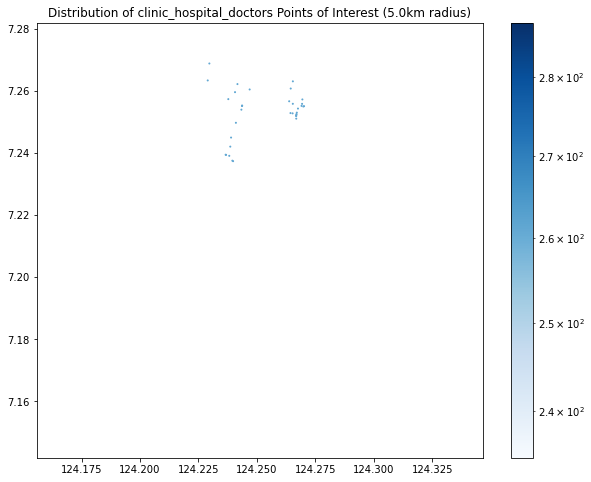

CPU times: user 2.34 s, sys: 283 ms, total: 2.62 s
Wall time: 13.3 s


In [21]:
%%time
final_with_hospital_df, hospital_amenities_df, hospital_count_distance_df = get_OSM_network_data(network,
                     satellite_df,
                     aoi_geojson,
                    ['clinic', 'hospital', 'doctors'],
                    5,
                    5000,
                    show_viz=True)

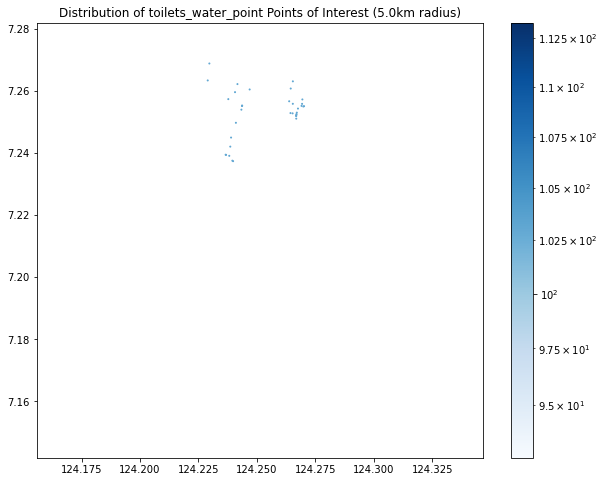

CPU times: user 2.02 s, sys: 312 ms, total: 2.33 s
Wall time: 7.33 s


In [22]:
%%time
final_with_hospital_with_water_df, hospital_with_water_amenities_df, hospital_with_water_count_distance_df = get_OSM_network_data(network,
                     final_with_hospital_df,
                     aoi_geojson,
                    ['toilets', 'water_point'],
                    5,
                    5000,
                    show_viz=True)

In [ ]:
%%time
sanitation_amenities = ['sanitary_dump_station', 'waste_disposal', 'waste_transfer_station']


final_with_hospital_with_water_san_df, hospital_with_water_san_amenities_df, hospital_with_water_san_count_distance_df = get_OSM_network_data(network,
                     final_with_hospital_with_water_df,
                     aoi_geojson,
                    sanitation_amenities,
                    5,
                    5000,
                    show_viz=True)

In [ ]:
final_with_hospital_with_water_san_df.head()

In [ ]:
final_with_hospital_with_water_san_df.amenity.value_counts()

In [ ]:
final_with_hospital_with_water_san_df.info()

In [61]:
final_with_hospital_with_water_df['count_toilets_water_point_within_5.0km'].value_counts()

0.0      285433
103.0       513
Name: count_toilets_water_point_within_5.0km, dtype: int64

In [ ]:
hospital_with_water_amenities_df

Demo:  
- Quezon City  
- Butuan city  
- Cotabato city  
- bacolod city  
- Pampanga

In [21]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ssampe")

In [ ]:
", ".join([str(i) for i in cotabato_aoi_geojson[0][0]][::-1])

In [ ]:
help(geolocator.reverse)

In [ ]:
reverse_geocode = geolocator.reverse(", ".join([str(i) for i in cotabato_aoi_geojson[0][1]][::-1]))
reverse_geocode

In [ ]:
Aroundreverse_geocode.address

In [ ]:
pd.json_normalize(reverse_geocode.raw)

In [ ]:
from shapely.geometry import box

bounds = (-1.3187316344406208, 50.607041876988994, 1.5737316344406207, 52.40735812301099)
polygon = box(*bounds)

print(polygon.centroid.x, polygon.centroid.y)

### Social Listening

In [ ]:
from shapely.geometry import box

bounds = cotabato_aoi_geojson[0][0][1], cotabato_aoi_geojson[0][3][0], cotabato_aoi_geojson[0][2][1], cotabato_aoi_geojson[0][1][0]
polygon = box(*bounds)



In [23]:
geolocator.reverse(", ".join([str(i) for i in [polygon.centroid.x, polygon.centroid.y]]))

Location(Kutang Bato Masonic Temple, Sinsuat Avenue, Ngo Compound, Poblacion Ⅶ, Cotabato City, Bangsamoro, 9605, Pilipinas / Philippines, (7.2113476, 124.2443054, 0.0))

In [29]:
reverse_geocode_center_of_geojson(laguan_aoi_geojson)

'Punta, Rizal, Calabarzon, Pilipinas / Philippines'